# Customer Retention

Project Aim:
1. Calculate and analyse the retention rates of different customers cohorts over time (Retention Rate Analysis).
2. Segment customers into distincts cohort(group) based on common beahviours, such as acquisition date    or first purchase date (Cohort Segmentation).
3. Identify retention trends
4. Churn Analysis(Reasons for customers leaving within various cohorts, and build a predictive model that can be used to predict churn behaviour)
5. Recommend Strategies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset_ecommerce.csv')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


## Data Cleaning

In [3]:
is_Nan = df.isnull().any() # check if any column has null value

In [4]:
null_count = df.isnull().sum() # sum of null values in each column
null_count

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
## drop rows with Nan and reset index
df = df.dropna().reset_index(drop=True)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [7]:
df['CustomerID'] = df['CustomerID'].astype(int)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal


In [8]:
# mask = df['InvoiceNo'].str.contains(r'[A-Za-z]', na=False)

# rows_with_chars = df[mask]                                    ##checking InvoiceNo that contains char

# print("Rows where 'invoice_id' contains alphabetic characters:")
# print(rows_with_chars)

## Exploratory Data Analysis

In [9]:
df['total_price'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,total_price
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50
...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new columns for month and year, and day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.day
df


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,total_price,Month,Year,Day
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,12,2010,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,12,2010,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,12,2010,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,12,2010,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,12,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,12,2011,9
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,12,2011,9
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,12,2011,9
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,12,2011,9


In [11]:
#grouping Data by the daily sales
daily_sales= df.groupby('Day')['total_price'].sum().reset_index()
daily_sales

,Day,total_price
0,1,35556784.74
1,2,31549914.60
2,3,28170112.14
3,4,38861462.69
4,5,42194963.61
5,6,48534686.61
6,7,40683823.68
7,8,41333247.01
8,9,33345916.03
9,10,37846606.59


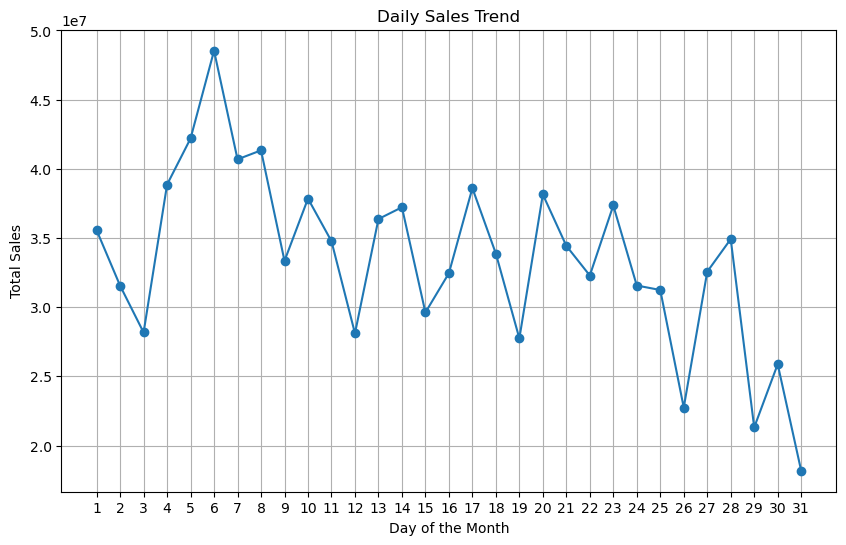

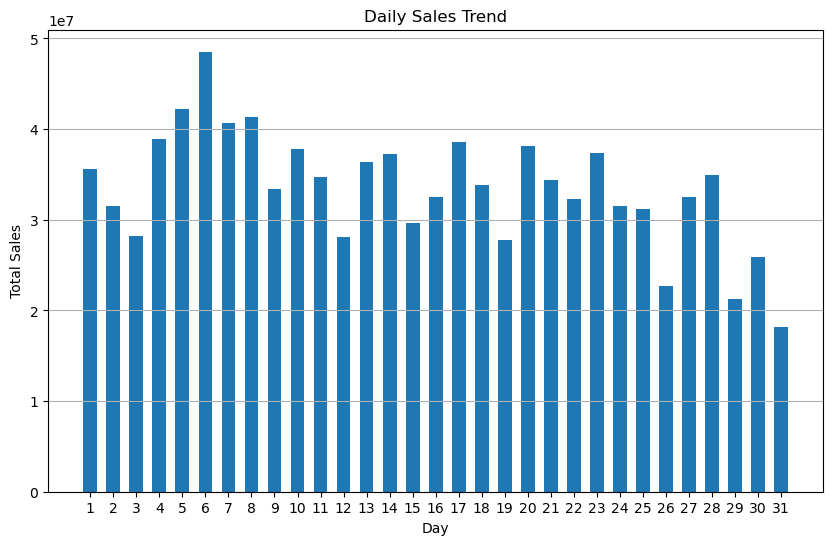

In [12]:
# plot total number of sales against daily sales
plt.figure(figsize=(10,6))

plt.plot(daily_sales['Day'],daily_sales['total_price'], marker = 'o')

plt.title("Daily Sales Trend")
plt.xlabel("Day of the Month")
plt.ylabel("Total Sales")

# Set the x-ticks to show all days available in the data
plt.xticks(daily_sales['Day'])

# Enable grid for better readability
plt.grid(True)

# Display the plot
plt.show()



plt.figure(figsize=(10, 6))
plt.bar(daily_sales['Day'], daily_sales['total_price'], width=0.6)
plt.title("Daily Sales Trend")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(daily_sales['Day']) 
plt.grid(True, axis='y')      
plt.show()

In [13]:
## Analyse Yearly sales
yearly_sales = df.groupby('Year')['total_price'].sum().reset_index()

print(yearly_sales)


   Year   total_price
0  2010  6.792367e+07
1  2011  9.695120e+08


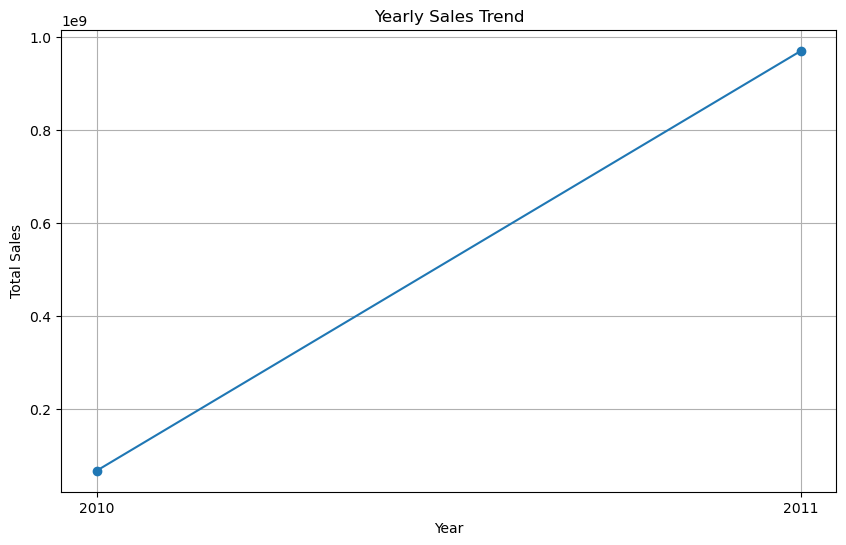

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['total_price'], marker='o', linestyle='-')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(yearly_sales['Year'])  # Ensures all years in the data are marked on the x-axis
plt.show()


In [15]:
# Group by product description 
product_sales = (
    df.groupby('Description')
      .agg({
          'Quantity': 'sum',            # Total quantity sold
          'total_price': 'sum',         # Total revenue from that product
          'UnitPrice': 'mean'           
      })
      .reset_index().sort_values(by = 'total_price', ascending= True)
)

# Sort the products by total price
product_sales_sorted = product_sales.sort_values(by='total_price', ascending=True)

# Inspect the top 10 best-selling products by total price
pd.options.display.float_format = '{:,.2f}'.format
product_sales_sorted



,Description,Quantity,total_price,UnitPrice
0,Books,2025341,"102,515,355.87",50.48
2,Cosmetics,2051088,"103,237,174.53",50.22
6,Kitchenware,2046704,"103,412,328.85",50.40
3,Electronics,2036733,"103,493,032.88",50.64
9,Toys,2063396,"103,897,984.57",50.41
4,Furniture,2063221,"103,900,362.31",50.41
1,Cloths,2054709,"103,972,282.86",50.57
8,Sports Equipment,2060571,"104,068,224.35",50.46
5,Jewelry,2065153,"104,233,481.29",50.58
7,Shoes,2069190,"104,705,493.60",50.60


In [16]:

# # Select the top 10 products by total sales
# top_n = 10
# top_products = product_sales_sorted.head(top_n)

# # Create a bar chart
# plt.figure(figsize=(12, 6))
# plt.bar(top_products['Description'], top_products['total_price'], color='skyblue')
# plt.title("Top 10 Products by Total Sales")
# plt.xlabel("Product Description")
# plt.ylabel("Total Sales")
# plt.xticks(rotation=45, ha='right')  
# plt.tight_layout()
# plt.show()


In [17]:
#visualising customer spending
customer_activity = (
    df.groupby('CustomerID')
      .agg({
          'InvoiceNo': pd.Series.nunique,  # Number of unique invoices represents purchase frequency
          'total_price': 'sum'             # Total spending per customer
      })
      .rename(columns={'InvoiceNo': 'PurchaseFrequency', 'total_price': 'TotalSpend'})
      .reset_index()
)

print("Customer Activity Metrics:")
customer_activity

Customer Activity Metrics:


,CustomerID,PurchaseFrequency,TotalSpend
0,12346,2,"5,342.40"
1,12347,7,"431,501.00"
2,12348,4,"82,378.47"
3,12349,1,"176,075.12"
4,12350,1,"48,173.37"
...,...,...,...
4367,18280,1,"18,907.36"
4368,18281,1,"26,009.01"
4369,18282,3,"36,010.74"
4370,18283,16,"2,008,747.62"


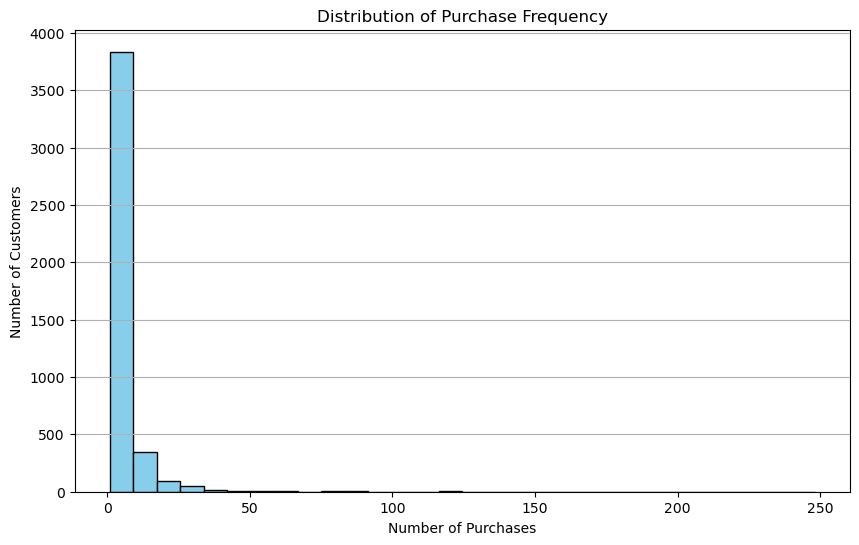

In [18]:
# Purchase behaviour

plt.figure(figsize=(10, 6))
plt.hist(customer_activity['PurchaseFrequency'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')  # optional grid on the y-axis
plt.show()


#### Calculating RFM (Recency, Frequency, Monetry)

In [19]:
# Calculating Recency,we choose a recent date from our transcation('invoice_Date).
recent_date = df['InvoiceDate'].max()
print('Most recent date is :', recent_date)

recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (recent_date - recency_df['InvoiceDate']).dt.days # subtracts each customer's latest purchase date from most recent date of the dataset
recency_df = recency_df.sort_values(by ='Recency', ascending= False)
recency_df

Most recent date is : 2011-12-09 12:50:00


,CustomerID,InvoiceDate,Recency
1046,13747,2010-12-01 10:37:00,373
3129,16583,2010-12-01 12:03:00,373
4096,17908,2010-12-01 11:45:00,373
1764,14729,2010-12-01 12:43:00,373
359,12791,2010-12-01 11:27:00,373
...,...,...,...
301,12713,2011-12-09 12:16:00,0
698,13263,2011-12-08 13:59:00,0
105,12476,2011-12-08 14:08:00,0
900,13536,2011-12-08 16:38:00,0


In [20]:
# Calculating Frequency: means how often customers makes purchases

# Group by CustomerID and count unique InvoiceNo entries
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the column for clarity
frequency_df.columns = ['CustomerID', 'Frequency']

# Sort from highest frequency to lowest
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

frequency_df


,CustomerID,Frequency
0,14911,248
1,12748,224
2,17841,169
3,14606,128
4,13089,118
...,...,...
4367,13877,1
4368,16400,1
4369,13878,1
4370,13886,1


In [21]:
# calculating Monetry; measures how much money a customer has spent in total

# Group by CustomerID and sum the TotalPrice
monetary_df = df.groupby('CustomerID')['total_price'].sum().reset_index()

monetary_df.columns = ['CustomerID', 'Monetary']

# Sort from highest to lowest spenders
monetary_df = monetary_df.sort_values(by='Monetary', ascending=False).reset_index(drop=True)

monetary_df


,CustomerID,Monetary
0,17841,"20,383,830.65"
1,14911,"15,362,741.47"
2,14096,"12,965,429.74"
3,12748,"11,912,482.34"
4,14606,"7,144,512.92"
...,...,...
4367,13366,99.12
4368,17347,66.30
4369,16881,60.32
4370,15753,30.82


In [22]:
# combine all into the dataframe
# Merge Recency, Frequency, and Monetary on CustomerID
rfm = recency_df.merge(frequency_df, on='CustomerID')
rfm = rfm.merge(monetary_df, on='CustomerID')

#  sort by Recency (most recent), then Frequency, then Monetary
# rfm = rfm.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False])

rfm.head()


,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,13747,2010-12-01 10:37:00,373,1,"1,058.89"
1,16583,2010-12-01 12:03:00,373,1,"57,940.68"
2,17908,2010-12-01 11:45:00,373,1,"145,427.69"
3,14729,2010-12-01 12:43:00,373,1,"171,449.72"
4,12791,2010-12-01 11:27:00,373,1,"1,305.70"


#### Cohort Segmentation

In [23]:
# cohort month based on their first purchase

# Create a new column for CohortMonth based on first purchase month per customer
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

df['CohortMonth'] = df['CohortMonth'].dt.to_timestamp() #convert to date time

df[['CustomerID', 'InvoiceDate', 'CohortMonth']]


,CustomerID,InvoiceDate,CohortMonth
0,17850,2010-12-01 08:26:00,2010-12-01
1,17850,2010-12-01 08:26:00,2010-12-01
2,17850,2010-12-01 08:26:00,2010-12-01
3,17850,2010-12-01 08:26:00,2010-12-01
4,17850,2010-12-01 08:26:00,2010-12-01
...,...,...,...
406824,12680,2011-12-09 12:50:00,2011-08-01
406825,12680,2011-12-09 12:50:00,2011-08-01
406826,12680,2011-12-09 12:50:00,2011-08-01
406827,12680,2011-12-09 12:50:00,2011-08-01


In [24]:
# cohort index, which measures the number of months since the customer first purchase

# Extract year and month from both InvoiceDate and CohortMonth
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortYearMonth'] = df['CohortMonth'].dt.to_period('M')

# Calculate difference in months between InvoiceDate and CohortMonth
df['CohortIndex'] = (df['InvoiceYearMonth'].dt.year - df['CohortYearMonth'].dt.year) * 12 + \
                    (df['InvoiceYearMonth'].dt.month - df['CohortYearMonth'].dt.month) + 1

df[['CustomerID', 'InvoiceDate', 'CohortMonth', 'CohortIndex']]


,CustomerID,InvoiceDate,CohortMonth,CohortIndex
0,17850,2010-12-01 08:26:00,2010-12-01,1
1,17850,2010-12-01 08:26:00,2010-12-01,1
2,17850,2010-12-01 08:26:00,2010-12-01,1
3,17850,2010-12-01 08:26:00,2010-12-01,1
4,17850,2010-12-01 08:26:00,2010-12-01,1
...,...,...,...,...
406824,12680,2011-12-09 12:50:00,2011-08-01,5
406825,12680,2011-12-09 12:50:00,2011-08-01,5
406826,12680,2011-12-09 12:50:00,2011-08-01,5
406827,12680,2011-12-09 12:50:00,2011-08-01,5


In [25]:
# ## cohort retention matrix

# # Step 1: Count unique customers in each CohortMonth & CohortIndex group
# cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# # Step 2: Pivot the table to create the retention matrix
# cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# # Step 3: Normalize by the number of customers in the first month of each cohort
# cohort_sizes = cohort_counts.iloc[:, 0]
# retention_matrix = cohort_counts.divide(cohort_sizes, axis=0)

#  # Format as percentage
# retention_matrix = retention_matrix.round(3)

# # Display the matrix



# plt.figure(figsize=(12, 6))
# sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="Blues")
# plt.title('Cohort Retention Matrix')
# plt.ylabel('Cohort Month')
# plt.xlabel('Cohort Index (Months Since First Purchase)')
# plt.show()


#### Retention Rates

In [26]:
# Count unique customers per cohort month and cohort index (Month X after first purchase)
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to get a matrix: CohortMonth as rows, CohortIndex as columns
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

#  Get cohort sizes (number of customers in month 1 of each cohort)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rate by dividing each column by cohort size
retention_rates = cohort_counts.divide(cohort_sizes, axis=0)

retention_rates = retention_rates.round(3)

#Remove the "CohortIndex" label from the column header
retention_rates.columns.name = None

retention_rates


,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.00,0.38,0.33,0.39,0.36,0.40,0.38,0.35,0.35,0.40,0.37,0.50,0.27
2011-01-01,1.00,0.24,0.28,0.24,0.33,0.30,0.26,0.26,0.31,0.35,0.37,0.15,NaN
2011-02-01,1.00,0.25,0.19,0.28,0.27,0.25,0.26,0.28,0.26,0.31,0.09,NaN,NaN
2011-03-01,1.00,0.19,0.26,0.22,0.23,0.18,0.26,0.24,0.29,0.09,NaN,NaN,NaN
2011-04-01,1.00,0.23,0.22,0.21,0.21,0.24,0.23,0.26,0.08,NaN,NaN,NaN,NaN
2011-05-01,1.00,0.24,0.17,0.17,0.21,0.24,0.27,0.10,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.00,0.21,0.19,0.27,0.25,0.34,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.00,0.21,0.20,0.23,0.27,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.00,0.25,0.25,0.25,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


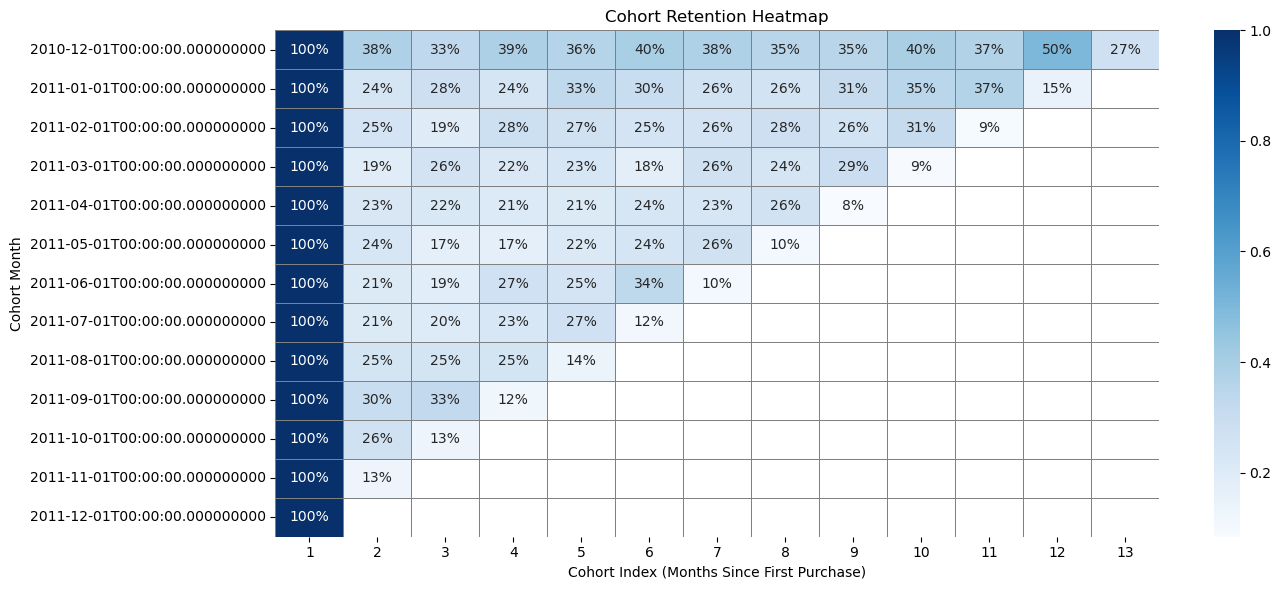

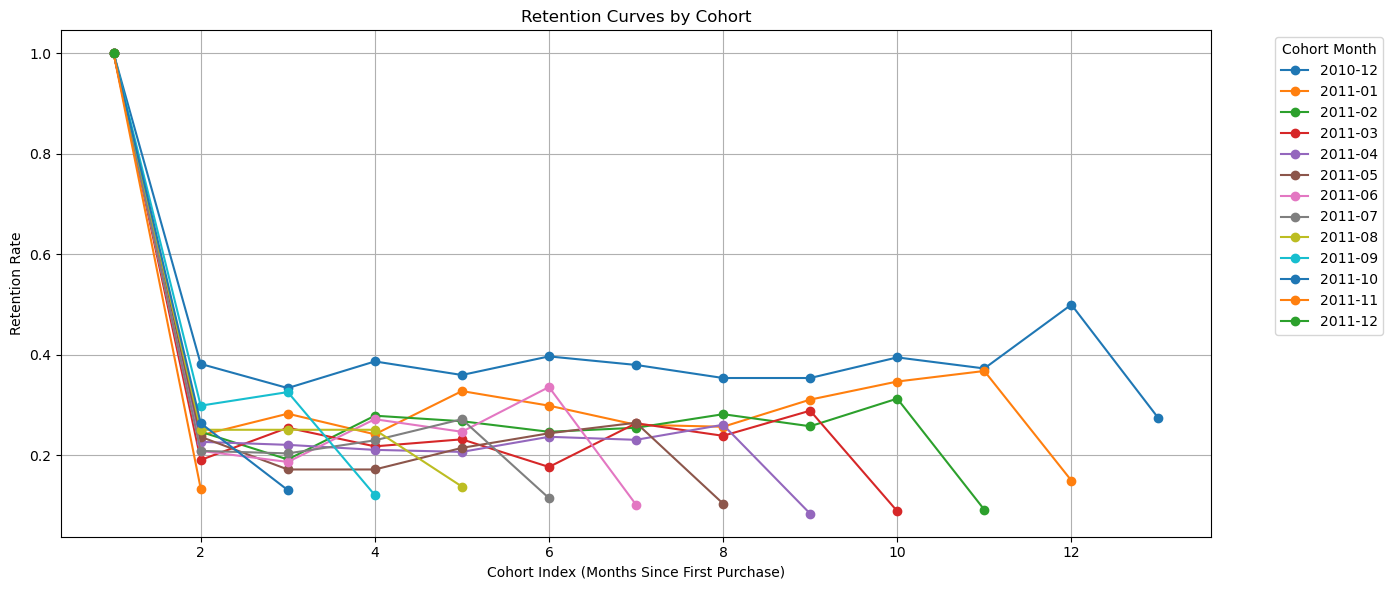

In [27]:
### Heat map and retention curves

plt.figure(figsize=(14, 6))
sns.heatmap(retention_rates, annot=True, fmt=".0%", cmap="Blues", linewidths=0.5, linecolor='gray')
plt.title("Cohort Retention Heatmap")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#  Retention Curve Line
plt.figure(figsize=(14, 6))
for cohort in retention_rates.index:
    plt.plot(retention_rates.columns, retention_rates.loc[cohort], marker='o', label=str(cohort)[:7])

plt.title("Retention Curves by Cohort")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Retention Rate")
plt.legend(title="Cohort Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
### To analyse churn timing
retention_deltas = retention_rates.diff(axis=1)

# Average drop per month across all cohorts
avg_drop_per_month = retention_deltas.mean().round(3)

print("Average month-over-month drop:")
print(avg_drop_per_month)
# Find first month where retention drops below a threshold
churn_threshold = 0.20 #definition of churn logic

#  DataFrame to hold first churn month per cohort
churn_timing = retention_rates.apply(lambda row: row[row < churn_threshold].first_valid_index(), axis=1)
print()
print("First significant churn month (per cohort):")
print(churn_timing)


Average month-over-month drop:
1      NaN
2    -0.76
3    -0.02
4    -0.00
5     0.00
6    -0.01
7    -0.03
8    -0.03
9    -0.02
10   -0.02
11   -0.07
12   -0.05
13   -0.23
dtype: float64

First significant churn month (per cohort):
CohortMonth
2010-12-01     NaN
2011-01-01   12.00
2011-02-01    3.00
2011-03-01    2.00
2011-04-01    9.00
2011-05-01    3.00
2011-06-01    3.00
2011-07-01    6.00
2011-08-01    5.00
2011-09-01    4.00
2011-10-01    3.00
2011-11-01    2.00
2011-12-01     NaN
dtype: float64


In [29]:
# Dropping NaNs and calculate average churn month
average_churn_month = churn_timing.dropna().mean()
print(f"\nAverage churn month: {average_churn_month:.1f}")



Average churn month: 4.7


basically this means customers start churning 5months after their first buy

2010-12-01: Customers who made their first purchase in December 2010 continued to come back consistently.

2011-01-01: This cohort retained customers for 12 months before falling below the churn threshold.

2011-03-01: Most customers churned quickly, within 2 months.

2011-04-01: Decent retention until Month 9

2010-12-01: Retention never dropped below the churn threshold, meaning this cohort stayed engaged


The cohorts that churned quickly were the ones from 2011-11-01 and 2011-03-01 in which they churned after 2 months of their first purchase

#### Investigating reasons for their churning, choosing the highest retention and the fastest churners

In [30]:

# High retention (benchmark)
high_retention_customers = df[df['CohortMonth'] == '2010-12-01']['CustomerID'].unique()

# Fast churners (churned by Month 2 or 3)
fast_churn_months = ['2011-03-01', '2011-11-01','2011-10-01','2011-06-01','2011-05-01','2011-02-01']  # You can expand this list
fast_churn_customers = df[df['CohortMonth'].isin(fast_churn_months)]['CustomerID'].unique()

#compare their metrics, fast rentention and high retention i.e their spending, their order value
high_monetary = df[df['CustomerID'].isin(high_retention_customers)].groupby('CustomerID')['total_price'].sum().mean()
fast_monetary = df[df['CustomerID'].isin(fast_churn_customers)].groupby('CustomerID')['total_price'].sum().mean()

#Purchase Frequency
high_freq = df[df['CustomerID'].isin(high_retention_customers)].groupby('CustomerID')['InvoiceNo'].nunique().mean()
fast_freq = df[df['CustomerID'].isin(fast_churn_customers)].groupby('CustomerID')['InvoiceNo'].nunique().mean()

#Product categories
high_products = df[df['CustomerID'].isin(high_retention_customers)]['Description'].value_counts().head()
fast_products = df[df['CustomerID'].isin(fast_churn_customers)]['Description'].value_counts().head()

#countries
high_countries = df[df['CustomerID'].isin(high_retention_customers)]['Country'].value_counts(normalize=True).head()
fast_countries = df[df['CustomerID'].isin(fast_churn_customers)]['Country'].value_counts(normalize=True).head()


print(" Average Monetary Value (Total Spend per Customer)")
print(f"High Retention Cohort (2010-12): {high_monetary:.2f}")
print(f"Fast Churn Cohorts:              {fast_monetary:.2f}")

print("\n Average Purchase Frequency (Invoices per Customer)")
print(f"High Retention Cohort (2010-12): {high_freq:.2f}")
print(f"Fast Churn Cohorts:              {fast_freq:.2f}")

print("\n Top Products Bought by High Retention Customers")
print(high_products)

print("\n Top Products Bought by Fast Churn Customers")
print(fast_products)

print("\n Country Distribution - High Retention Cohort (2010-12)")
print(high_countries)

print("\n Country Distribution - Fast Churn Cohorts")
print(fast_countries)



 Average Monetary Value (Total Spend per Customer)
High Retention Cohort (2010-12): 477332.71
Fast Churn Cohorts:              154848.32

 Average Purchase Frequency (Invoices per Customer)
High Retention Cohort (2010-12): 10.89
Fast Churn Cohorts:              3.24

 Top Products Bought by High Retention Customers
Jewelry        17945
Toys           17887
Shoes          17883
Kitchenware    17816
Electronics    17721
Name: Description, dtype: int64

 Top Products Bought by Fast Churn Customers
Sports Equipment    12412
Jewelry             12391
Cloths              12265
Furniture           12251
Toys                12227
Name: Description, dtype: int64

 Country Distribution - High Retention Cohort (2010-12)
Libya           0.04
Nigeria         0.04
Cameroon        0.04
Cote d'Ivoire   0.04
Sierra Leone    0.04
Name: Country, dtype: float64

 Country Distribution - Fast Churn Cohorts
Rwanda         0.04
Niger          0.04
Sierra Leone   0.04
Somalia        0.04
Senegal        0.04
Na

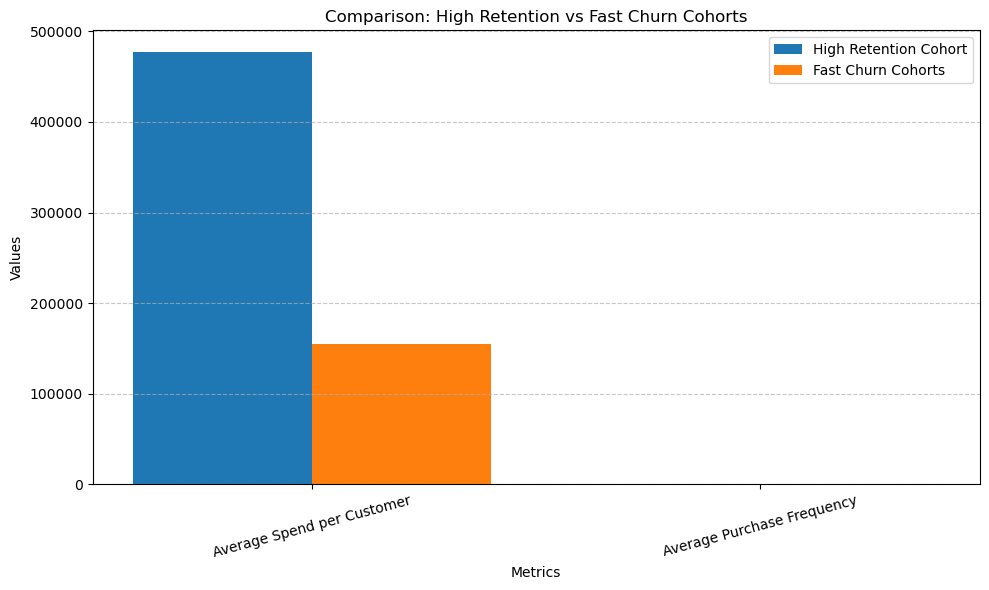

In [31]:
#visualization
metrics = ['Average Spend per Customer', 'Average Purchase Frequency']
high_retention_values = [477332.71, 10.89]
fast_churn_values = [154848.32, 3.24]

# Create positions for bar chart groups
x = range(len(metrics))  # [0, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, high_retention_values, width=0.4, label='High Retention Cohort', align='center')
plt.bar([i + 0.4 for i in x], fast_churn_values, width=0.4, label='Fast Churn Cohorts', align='center')

# Labels and Title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison: High Retention vs Fast Churn Cohorts')
plt.xticks([i + 0.2 for i in x], metrics, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Based on the analysis above,
1. High Retention Cohort customers spends 3× more than the Fast Churn Cohort customers, which means    customers who spends big are less likely to churn

2. High Retention customers bought 10.89 times on average, compared to 3.24 times for fast churners, which means that Low-frequency buyers are more at risk of fast churn and customers who buy more often are less likely to churn

3. High Retention Customers mainly bought:Jewelry, Toys, Shoes, Kitchenware, Electronics
4. Fast Churn Customers mainly bought: Sports Equipment, Jewelry, Cloths, Furniture, Toys
    This means that: Jewelry and Toys appear in both lists (general popularity).
     Sports Equipment and Furniture (fast churners) might be more one-time or seasonal buys, leading to lower return rates.
     Products like Jewelry, Kitchenware, and Electronics might create repeat needs or emotional attachment, encouraging loyalty

5. High Retention: Libya, Nigeria, Cameroon, Côte d'Ivoire, Sierra Leone

6. Fast Churn: Rwanda, Niger, Somalia, Senegal
 This menas that Different regions show different behavior.
  Possibly economic stability, customers from more stronger economic hub are more likley to repeat buy than customers from less economic stable country

<b>Overall Conclusion</b>

Spending more and buying more often correlates with higher retention.

Product type and country have a clear impact on churn risk.

Fast churners are likely single-need buyers or lower engagement segments.

## BG/NBD Model

In [32]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define observation period
observation_end_date = df['InvoiceDate'].max()

# Create first purchase date
customer_first_purchase = df.groupby('CustomerID')['InvoiceDate'].min()
print('Customer first Purchase:\n')
print(customer_first_purchase)
print()
# Create last purchase date
customer_last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()
print('customer Last Purchase: \n')
print(customer_last_purchase)

# Calculate frequency (number of repeat purchases)
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique() - 1

# Calculate recency (days between first and last purchase)
recency = (customer_last_purchase - customer_first_purchase).dt.days

# Calculate T (days between first purchase and end of observation period)
T = (observation_end_date - customer_first_purchase).dt.days

# summary dataframe
rfm = pd.DataFrame({
    'frequency': customer_frequency,
    'recency': recency,
    'T': T
})
rfm

Customer first Purchase:

CustomerID
12346   2011-01-18 10:01:00
12347   2010-12-07 14:57:00
12348   2010-12-16 19:09:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-08-05 13:35:00
18283   2011-01-06 14:14:00
18287   2011-05-22 10:39:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

customer Last Purchase: 

CustomerID
12346   2011-01-18 10:17:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-12-02 11:43:00
18283   2011-12-06 12:02:00
18287   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]


,frequency,recency,T
CustomerID,,,
12346,1,0,325
12347,6,365,366
12348,3,282,357
12349,0,0,18
12350,0,0,309
...,...,...,...
18280,0,0,277
18281,0,0,180
18282,2,118,125


In [33]:
from lifetimes import BetaGeoFitter

# Initialize and fit model
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(rfm['frequency'], rfm['recency'], rfm['T'])

#  Predict Future Purchases per Customer 
rfm['predicted_purchases_6m'] = bgf.predict(180, rfm['frequency'], rfm['recency'], rfm['T'])

rfm[['frequency', 'recency', 'T', 'predicted_purchases_6m']].head()


,frequency,recency,T,predicted_purchases_6m
CustomerID,,,,
12346,1,0,325,0.20
12347,6,365,366,2.93
12348,3,282,357,1.60
12349,0,0,18,2.17
12350,0,0,309,0.36


1. Customer 12346
    frequency = 1 Only one repeat purchase.

    recency = 0  Only bought once, and last purchase same day as first purchase.

    T = 325  Observed for 325 days.

    Predicted future purchases = 0.20, Very low future activity expected.
    <br><br>

2.  Customer 12347
    frequency = 6  Made 6 repeat purchases (high frequency!).

    recency = 365  Active throughout a full year!

    T = 366  Observed for almost a full year.

    Predicted future purchases = 2.93  High chance of buying again (almost 3 purchases predicted in next 6 months).
    <br><br>

3.  Customer 12348
    frequency = 3 ➔ Moderate buyer.

    recency = 282 ➔ Stayed active over many months.

    T = 357 ➔ Observation almost a full year.

    Predicted future purchases = 1.60 ➔ Moderate chance of return buying.
    <br><br>

4. Customer 12349
    frequency = 0 ➔ Only one purchase.

    recency = 0 ➔ Only one transaction date.

    T = 18 ➔ Observed only 18 days.

    Predicted future purchases = 2.17 ➔ high predicted future purchases
    <br><br>

5. . Customer 12350
    frequency = 0 ➔ Only one purchase.

    recency = 0 ➔ Only one transaction.

    T = 309 ➔ Observed for a long time (309 days) but no further purchases.

    Predicted future purchases = 0.36 ➔ Very low predicted activity (inactive for long).

In [34]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 12346 to 18287
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               4372 non-null   int64  
 1   recency                 4372 non-null   int64  
 2   T                       4372 non-null   int64  
 3   predicted_purchases_6m  4372 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 170.8 KB


#### Validating the model with the spend data

In [35]:

# Get average spend per customer
customer_monetary = df.groupby('CustomerID')['total_price'].sum() / (df.groupby('CustomerID')['InvoiceNo'].nunique())
print("Average Customer spending:\n")
print(customer_monetary)
print()
#Predicted revenue = predicted purchases × average monetary value
rfm['predicted_revenue_6m'] = rfm['predicted_purchases_6m'] * customer_monetary
print('Predicted Revenue:\n')
rfm['predicted_revenue_6m']


Average Customer spending:

CustomerID
12346     2,671.20
12347    61,643.00
12348    20,594.62
12349   176,075.12
12350    48,173.37
           ...    
18280    18,907.36
18281    26,009.01
18282    12,003.58
18283   125,546.73
18287    69,685.74
Length: 4372, dtype: float64

Predicted Revenue:



CustomerID
12346       531.43
12347   180,831.86
12348    33,015.31
12349   382,813.09
12350    17,478.87
           ...    
18280     7,546.80
18281    14,912.64
18282    34,038.47
18283   936,640.69
18287   133,063.99
Name: predicted_revenue_6m, Length: 4372, dtype: float64

In [36]:
# Add it to your RFM table
rfm['avg_monetary_value'] = customer_monetary

In [37]:
rfm

,frequency,recency,T,predicted_purchases_6m,predicted_revenue_6m,avg_monetary_value
CustomerID,,,,,,
12346,1,0,325,0.20,531.43,"2,671.20"
12347,6,365,366,2.93,"180,831.86","61,643.00"
12348,3,282,357,1.60,"33,015.31","20,594.62"
12349,0,0,18,2.17,"382,813.09","176,075.12"
12350,0,0,309,0.36,"17,478.87","48,173.37"
...,...,...,...,...,...,...
18280,0,0,277,0.40,"7,546.80","18,907.36"
18281,0,0,180,0.57,"14,912.64","26,009.01"
18282,2,118,125,2.84,"34,038.47","12,003.58"


In [38]:

# the top 10 customers by predicted revenue
top_customers = rfm.sort_values('predicted_revenue_6m', ascending=False).head(10)
top_customers

,frequency,recency,T,predicted_purchases_6m,predicted_revenue_6m,avg_monetary_value
CustomerID,,,,,,
14096,33,97,101,42.68,"16,274,020.73","381,336.17"
17841,168,371,372,73.45,"8,858,867.85","120,614.38"
14911,247,372,372,107.87,"6,682,400.42","61,946.54"
12748,223,372,373,97.16,"5,167,292.27","53,180.72"
13521,2,8,9,9.71,"3,435,015.79","353,832.69"
15993,9,35,43,20.66,"3,128,985.59","151,441.76"
14606,127,372,372,55.60,"3,103,492.23","55,816.51"
15311,117,373,373,51.12,"2,729,883.77","53,399.58"
14456,13,137,141,13.49,"2,464,054.09","182,675.72"


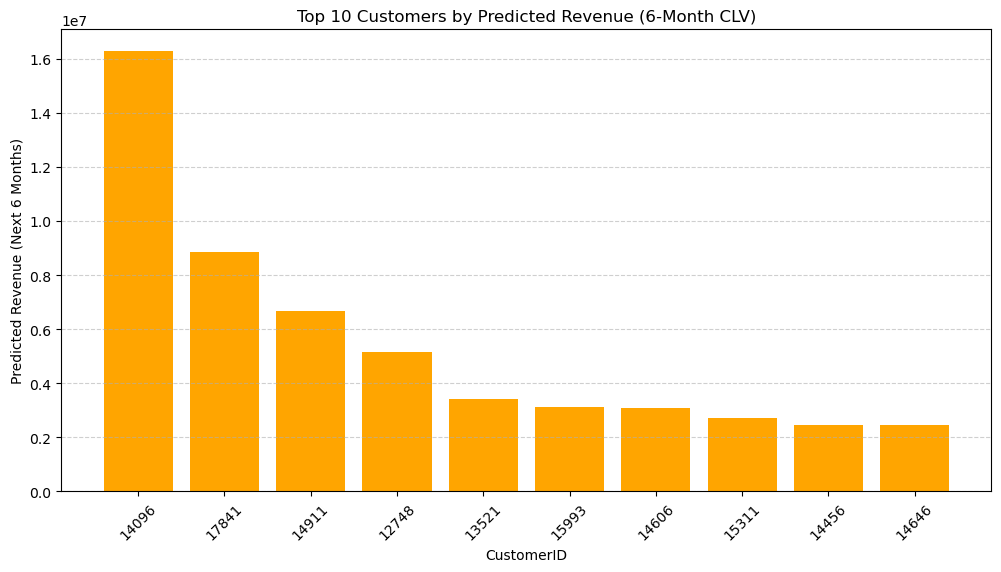

In [39]:
# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_customers.index.astype(str), top_customers['predicted_revenue_6m'], color='orange')

# Formatting
plt.xlabel('CustomerID')
plt.ylabel('Predicted Revenue (Next 6 Months)')
plt.title('Top 10 Customers by Predicted Revenue (6-Month CLV)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

Customer 14096 is expected to generate over 16M in revenue in the next 6 months because of both high purchase frequency and massive average order value (381K per order).

Customers 17841, 14911, and 12748 also have high repeat rates (168–247 purchases) and substantial predicted revenue.

Customer 13521, despite only 2 repeat purchases, is forecasted to bring in over 3.4M, because of an extremely high avg spend per purchase (353K+).

## Building Random Forest Regressor

In [40]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,total_price,Month,Year,Day,CohortMonth,InvoiceYearMonth,CohortYearMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,12,2010,1,2010-12-01,2010-12,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,"1,862.95",12,2010,1,2010-12-01,2010-12,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,"4,796.22",12,2010,1,2010-12-01,2010-12,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,12,2010,1,2010-12-01,2010-12,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,"1,941.50",12,2010,1,2010-12-01,2010-12,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,12,2011,9,2011-08-01,2011-12,2011-08,5
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,"8,521.10",12,2011,9,2011-08-01,2011-12,2011-08,5
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,12,2011,9,2011-08-01,2011-12,2011-08,5
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,"3,592.35",12,2011,9,2011-08-01,2011-12,2011-08,5


In [41]:

cutoff_date = '2011-08-31'
calibration_df = df[df['InvoiceDate'] <= cutoff_date]
holdout_df = df[df['InvoiceDate'] > cutoff_date]

# Check date ranges
print("Calibration Period:", calibration_df['InvoiceDate'].min(), "to", calibration_df['InvoiceDate'].max())
print("Holdout Period:", holdout_df['InvoiceDate'].min(), "to", holdout_df['InvoiceDate'].max())

Calibration Period: 2010-12-01 08:26:00 to 2011-08-30 17:23:00
Holdout Period: 2011-08-31 08:55:00 to 2011-12-09 12:50:00


In [42]:
## to get actual total revenue
# Actual future revenue
actual_revenue = holdout_df.groupby('CustomerID')['total_price'].sum()
#merge to the rfm dataset
rfm['actual_revenue'] = actual_revenue
rfm['actual_revenue'] = rfm['actual_revenue'].fillna(0)# fill NaNs for customers with no future transactions
rfm

,frequency,recency,T,predicted_purchases_6m,predicted_revenue_6m,avg_monetary_value,actual_revenue
CustomerID,,,,,,,
12346,1,0,325,0.20,531.43,"2,671.20",0.00
12347,6,365,366,2.93,"180,831.86","61,643.00","154,300.83"
12348,3,282,357,1.60,"33,015.31","20,594.62","5,162.79"
12349,0,0,18,2.17,"382,813.09","176,075.12","176,075.12"
12350,0,0,309,0.36,"17,478.87","48,173.37",0.00
...,...,...,...,...,...,...,...
18280,0,0,277,0.40,"7,546.80","18,907.36",0.00
18281,0,0,180,0.57,"14,912.64","26,009.01",0.00
18282,2,118,125,2.84,"34,038.47","12,003.58","20,042.96"


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

features = rfm[['frequency', 'recency', 'T', 'avg_monetary_value']]
target = rfm['actual_revenue']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#  Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predict on test set
y_pred = rf_model.predict(X_test)

#  Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# ✅ Step 6: Output results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 39733.68
Root Mean Squared Error (RMSE): 269886.25


In [45]:
customer_ids = X_test.index
comparison_df_RF = pd.DataFrame({
    'CustomerID': customer_ids,
    'Actual_Revenue': y_test.values,
    'Predicted_Future_Revenue': y_pred
})
comparison_df_RF

,CustomerID,Actual_Revenue,Predicted_Future_Revenue
0,15079,0.00,865.70
1,12930,"22,737.72","32,648.28"
2,12956,0.00,0.00
3,12904,"109,883.09","111,213.71"
4,17411,"72,532.89","50,276.71"
...,...,...,...
870,13310,"47,036.51","79,453.51"
871,12417,"109,875.75","237,151.49"
872,15489,"85,223.81","99,072.51"
873,14667,"480,306.61","414,539.46"


In [51]:
## Classifier RF for churn and not churn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Step 1: Create churn label (1 = churned, 0 = not churned)
rfm['churn'] = np.where(rfm['actual_revenue'] == 0, 1, 0)

# Step 2: Define features and target
features = rfm[['frequency', 'recency', 'T', 'avg_monetary_value']]
target = rfm['churn']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict churn on test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Identify customers predicted to churn
X_test = X_test.copy()
X_test['Predicted_Churn'] = y_pred
X_test['CustomerID'] = X_test.index  # Add index back in for reference

# Filter churned customers
churned_customers = X_test[X_test['Predicted_Churn'] == 1]

# Show top churned customers
churned_customers = churned_customers[['CustomerID', 'frequency', 'recency', 'T', 'avg_monetary_value']]
print("\n🔍 Predicted Churned Customers:\n")
churned_customers


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       617
           1       1.00      0.98      0.99       258

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875


🔍 Predicted Churned Customers:



,CustomerID,frequency,recency,T,avg_monetary_value
CustomerID,,,,,
15079,15079,4,153,365,"28,571.47"
12956,12956,0,0,305,"52,827.13"
13005,13005,2,72,245,"21,663.14"
13485,13485,0,0,232,"51,103.60"
16124,16124,1,1,316,"17,684.40"
...,...,...,...,...,...
15639,15639,0,0,133,"72,765.75"
12665,12665,1,6,331,"1,673.12"
15746,15746,1,0,133,"32,292.65"


In [48]:
# Example: Look up predicted revenue for CustomerID 18283
customer_id = 18183

# Access directly using .loc[]
predicted = rfm.loc[customer_id, 'actual_revenue']

print(f"Predicted Revenue for Customer {customer_id}: {predicted:,.2f}")


Predicted Revenue for Customer 18183: 0.00


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3497, 4)
(875, 4)
(3497,)
(875,)


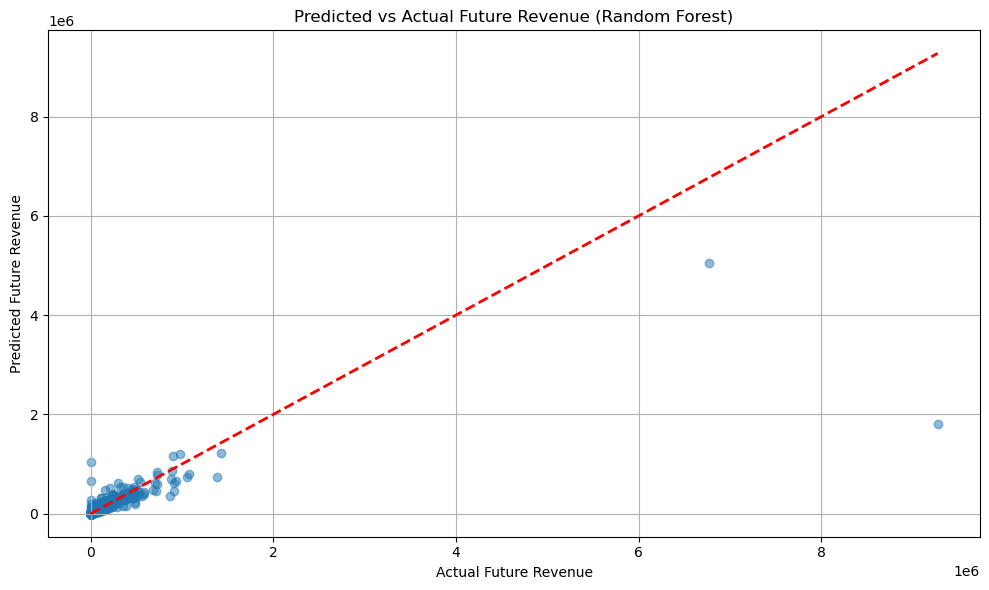

In [ ]:


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Plot where predictions = actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Labels and Title
plt.xlabel('Actual Future Revenue')
plt.ylabel('Predicted Future Revenue')
plt.title('Predicted vs Actual Future Revenue (Random Forest)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### K-Means Clustering

Customer Count per Cluster:
 0    2465
1    1730
2       4
3     173
Name: Cluster, dtype: int64


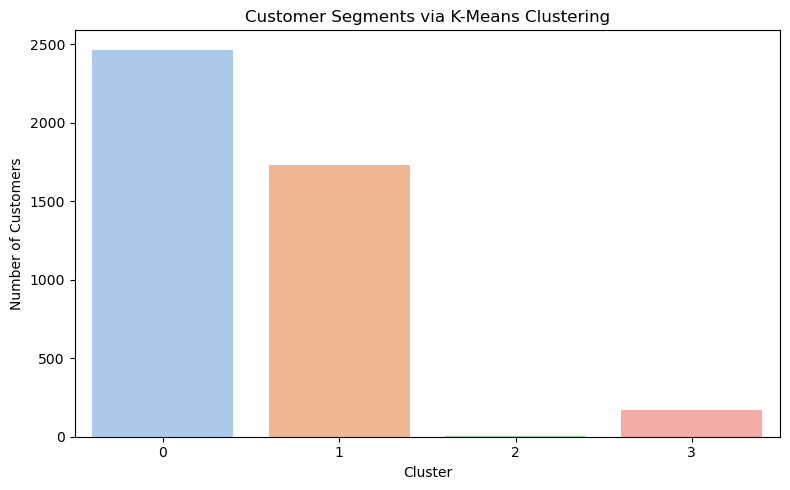

,frequency,recency,T,avg_monetary_value
Cluster,,,,
0,0.94,29.40,154.59,"51,956.40"
1,5.56,262.48,314.41,"48,498.02"
2,167.75,303.00,304.50,"154,269.45"
3,30.12,320.18,326.77,"54,421.05"


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

#  Analyze Cluster Sizes
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("Customer Count per Cluster:\n", cluster_counts)

#  Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Cluster', palette='pastel')
plt.title('Customer Segments via K-Means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# STEP 6: View Average Metrics per Cluster
cluster_profiles = rfm.groupby('Cluster')[['frequency', 'recency', 'T', 'avg_monetary_value']].mean().round(2)
cluster_profiles